### Analyse des résultats de l'immersion

In [5]:
from Analyse import *
from save_video import *

## Face 0

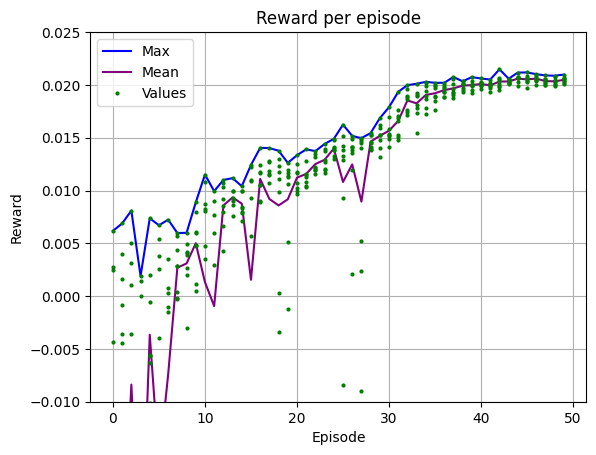

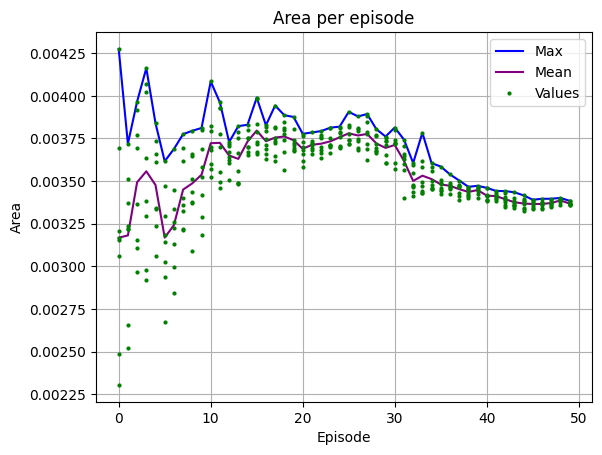

In [5]:
print_reward_mean('drl_pale_0', ymin=-0.01, ymax=0.025, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_0', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 1


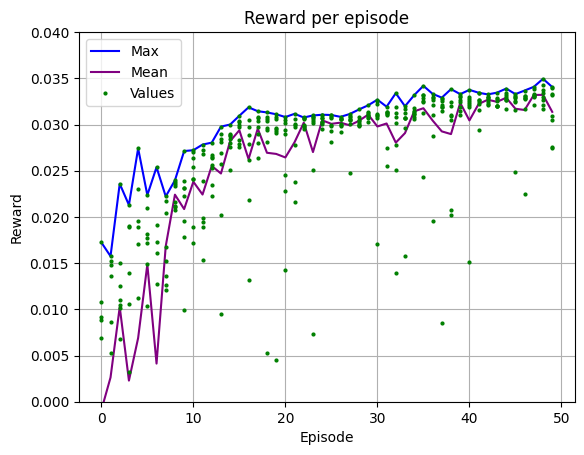

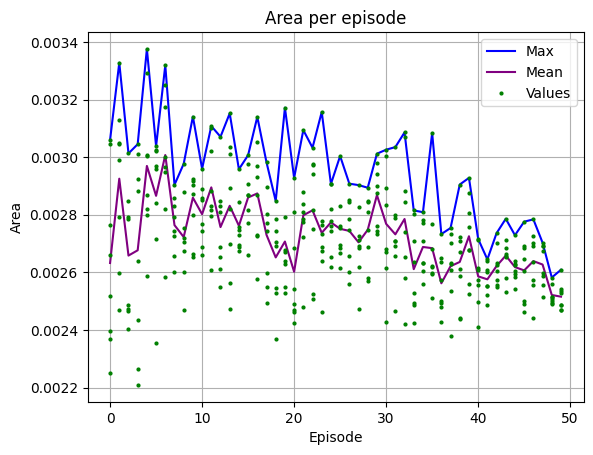

In [4]:
print_reward_mean('drl_pale_1', ymin=0, ymax=0.04, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_1', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 2


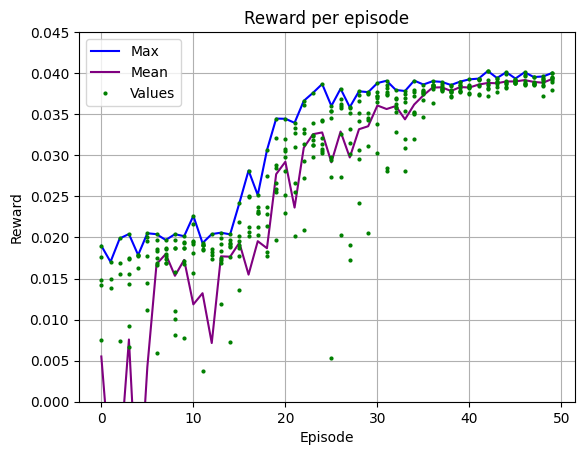

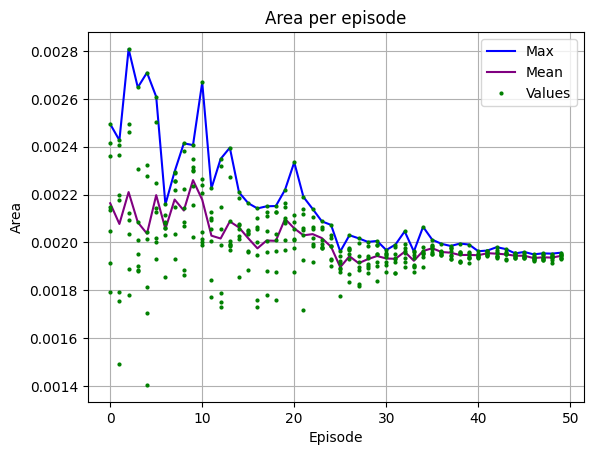

In [6]:
print_reward_mean('drl_pale_2', ymin=0, ymax=0.045, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_2', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 3

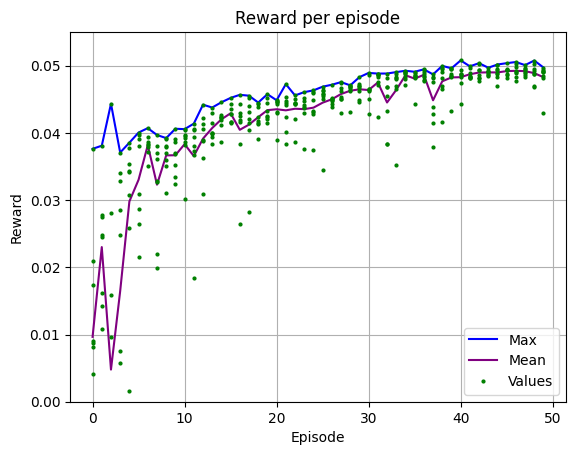

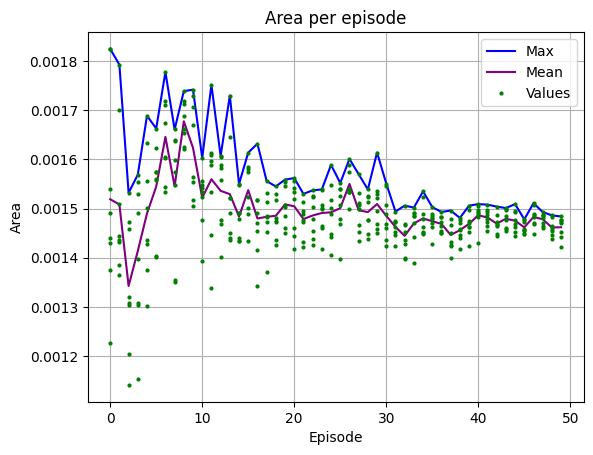

In [7]:
print_reward_mean('drl_pale_3', ymin=0, ymax=0.055, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_3', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 4

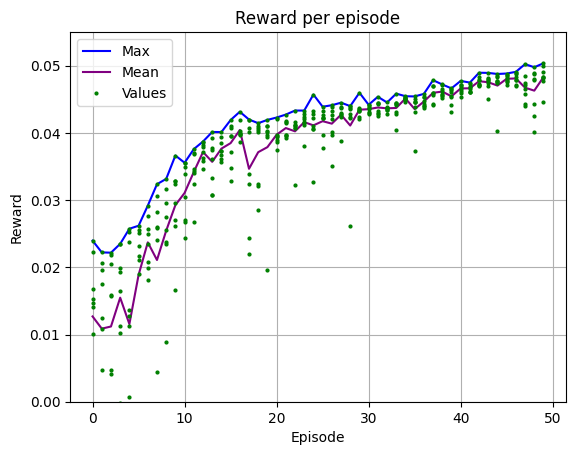

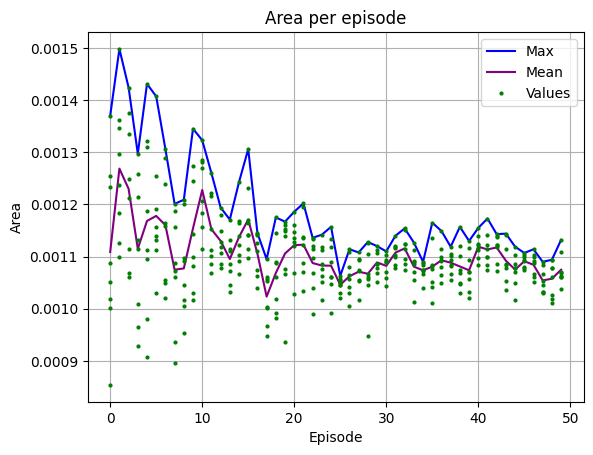

In [8]:
print_reward_mean('drl_pale_4', ymin=0, ymax=0.055, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_4', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 5

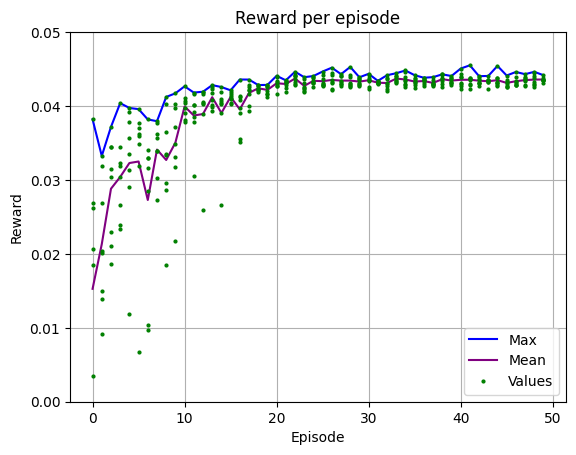

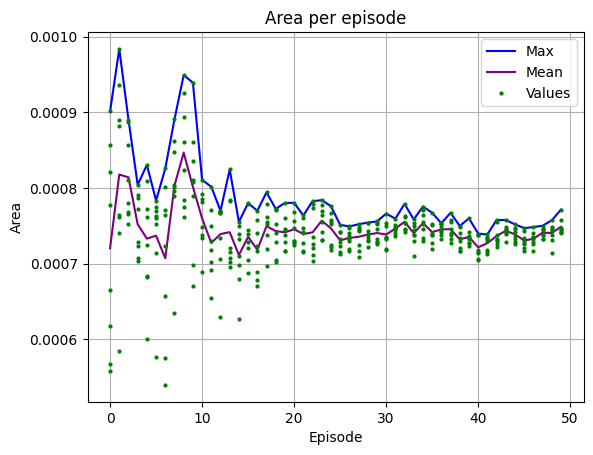

In [9]:
print_reward_mean('drl_pale_5', ymin=0, ymax=0.05, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_5', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


## Face 6

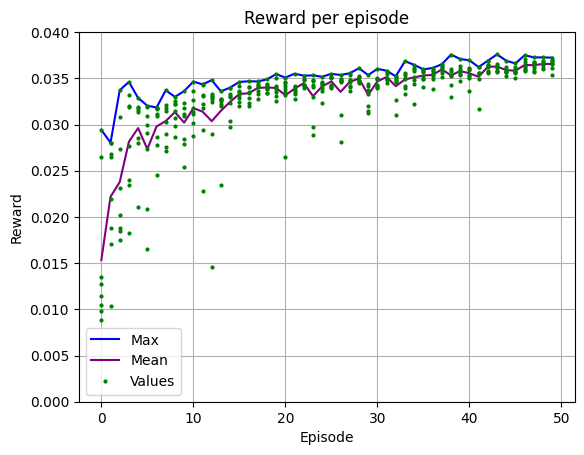

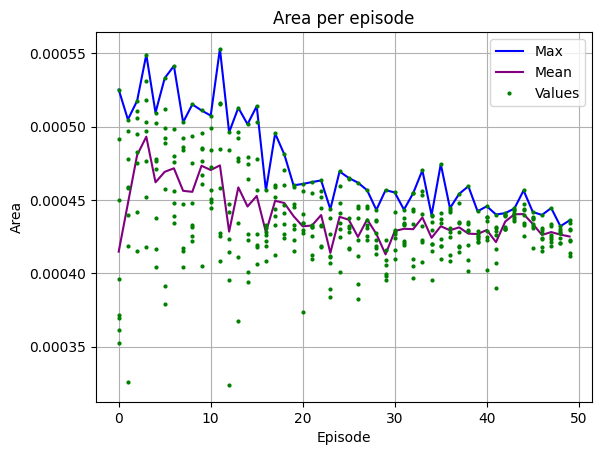

In [10]:
print_reward_mean('drl_pale_6', ymin=0, ymax=0.04, y=None, title=None, legend_pointille= None)
print_area_mean('drl_pale_6', ymin=-14, ymax=-13, y=None, title=None, legend_pointille= None)


In [1]:
def plot_video(file, title, save_folder, title_video,ylim=(-0.05,0.15), cdt_init=None, title_init="", finesse_init=""):
    img= []
    L_control = []
    L_parameter = []
    img_files = []

    if cdt_init is not None:
        L_control.append(reconstruct_control_points(np.concatenate((cdt_init,np.zeros(2)))))
        img.append(airfoil1(L_control[0],16))
        L_parameter.append(np.concatenate((cdt_init,np.zeros(2))))
        airfoil_plot(L_control[0], img[0], title, L_parameter[0], file_save=save_folder+f'/video0',ylim=ylim, ep=title_init, finesse = finesse_init)
        img_files.append(save_folder +f'/video0.png')

    df = pd.read_csv(file + "/Values.txt", sep="\t", header=0)
    for i in range(df['Index'].max()):
        df_max = df.groupby(df['Index'])['Reward'].max()
        coeffs = df[["edge", "1","2","3","4","5","6","7"]][df['Reward']== df_max[i]].to_numpy()
        L_control.append(reconstruct_control_points(np.concatenate((coeffs[0],np.zeros(2)))))
        img.append(airfoil1(L_control[i],16))
        L_parameter.append(np.concatenate((coeffs[0],np.zeros(2))))
        airfoil_plot(L_control[i], img[i], title, L_parameter[i], file_save=save_folder+f'/video{i+1}',ylim=ylim, ep=i+1, finesse = round(df_max[i],3))

        img_files.append(save_folder +f'/video{i+1}.png')

    writer = imageio.get_writer(save_folder + '/' + title_video, fps=3)
    for im in img_files:
        writer.append_data(imageio.imread(im))
    writer.close()

    for image_file in img_files:
        os.remove(image_file)